In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob
import hashlib
import gzip
import re

In [2]:
def get_md5sum(x):
    return hashlib.md5(x.encode("utf-8")).hexdigest()[:10]

In [3]:
datasets = ['4843e2efab', '5625abfa64', '147b4cc2c4', 'ad4291da14', 'acc997e351', '30fa72e389', \
            '3bb0c8b8c9', '819174a0d9', '4938671464', '4a49743f7c', 'fd420d3cfd', '75525c2909', \
            'c735334976', 'e53e2c7c3b', 'e87d3a7358', '87e9a56984', '4a2f86d1bf', '339add6c49']

labels = ["gut_sum_high_c3", "gut_sum_high_c5", "gut_sum_high_c10", "gut_sum_mid_c3", "gut_sum_mid_c5", "gut_sum_mid_c10", \
 "calc_2095_high_c3", "calc_2095_high_c5", "calc_2095_high_c10", "calc_2095_mid_c3", "calc_2095_mid_c5", "calc_2095_mid_c10", \
 "horse_sum_high_c3", "horse_sum_high_c5", "horse_sum_high_c10", "horse_sum_mid_c3", "horse_sum_mid_c5", "horse_sum_mid_c10"]

labels_clean = [
    "Gut:\nModerate Damage\nCov. 3X",
    "Gut:\nModerate Damage\nCov. 5X",
    "Gut:\nModerate Damage\nCov. 10X",
    "Gut:\nMild Damage\nCov. 3X",
    "Gut:\nMild Damage\nCov. 5X",
    "Gut:\nMild Damage\nCov. 10X",
    "Calculus:\nModerate Damage\nCov. 3X",
    "Calculus:\nModerate Damage\nCov. 5X",
    "Calculus:\nModerate Damage\nCov. 10X",
    "Calculus:\nMild Damage\nCov. 3X",
    "Calculus:\nMild Damage\nCov. 5X",
    "Calculus:\nMild Damage\nCov. 10X",
    "Bone:\nModerate Damage\nCov. 3X",
    "Bone:\nModerate Damage\nCov. 5X",
    "Bone:\nModerate Damage\nCov. 10X",
    "Bone:\nMild Damage\nCov. 3X",
    "Bone:\nMild Damage\nCov. 5X",
    "Bone:\nMild Damage\nCov. 10X"
]

labels_dict = {key: get_md5sum(key) for key in labels}
labels_dict_inv = {value: key for key, value in labels_dict.items()}
print(labels_dict_inv)

labels_dict_clean = {labels[i] : labels_clean[i] for i in range(len(labels))}

{'4843e2efab': 'gut_sum_high_c3', '5625abfa64': 'gut_sum_high_c5', '147b4cc2c4': 'gut_sum_high_c10', 'ad4291da14': 'gut_sum_mid_c3', 'acc997e351': 'gut_sum_mid_c5', '30fa72e389': 'gut_sum_mid_c10', '3bb0c8b8c9': 'calc_2095_high_c3', '819174a0d9': 'calc_2095_high_c5', '4938671464': 'calc_2095_high_c10', '4a49743f7c': 'calc_2095_mid_c3', 'fd420d3cfd': 'calc_2095_mid_c5', '75525c2909': 'calc_2095_mid_c10', 'c735334976': 'horse_sum_high_c3', 'e53e2c7c3b': 'horse_sum_high_c5', 'e87d3a7358': 'horse_sum_high_c10', '87e9a56984': 'horse_sum_mid_c3', '4a2f86d1bf': 'horse_sum_mid_c5', '339add6c49': 'horse_sum_mid_c10'}


In [4]:
filter_list = ["megahit.config0", "carpedeam.config0", "spades.config0", "penguin.config0"]

In [5]:
def map_assembler(cell):
    if "carpedeam" in cell:
        return "CarpeDeam"
    elif "penguin" in cell:
        return "PenguiN"
    elif "megahit" in cell:
        return "MEGAHIT"
    elif "spades" in cell:
        return "metaSPAdes"
    else:
        return cell  # Return the cell as is if none of the conditions are met

In [10]:
# Assuming 'filter_list', 'datasets', and 'dicr' are defined elsewhere in your script

dic_g = {dataId: {} for dataId in datasets[0:6]}
ref_len = 426480543
sample = "ancientGut"
# "ancientCalc"
# "ancientHorse"

for assembler in filter_list:
    for dataset in datasets:
        # Adjusted file path to match your new data structure
        file = f"data/{sample}/results/assembly-precision-sense/{dataset}.raw-raw.mmseqs.{assembler}/{dataset}.raw-raw.assm.{assembler}.fasta.db.500.sense2"
        if os.path.isfile(file):
            aln_per_seqid = []  # List to store the third column values (coverage sequence identity)
            
            # Open the file and read the lines
            with open(file, 'r') as f:
                for line in f:
                    parts = line.strip().split()  # Split each line into its components
                    if len(parts) >= 3:  # Ensure the line has at least three columns
                        cov_seqid = float(parts[2])  # Convert the third column to a float and append it to the list
                        aln_per_seqid.append(cov_seqid)
            
            # Update your dictionary with the values from the file
            dic_g[dataset][assembler] = aln_per_seqid

In [11]:
# Assuming 'filter_list', 'datasets', and 'dicr' are defined elsewhere in your script

dic_c = {dataId: {} for dataId in datasets[6:12]}
ref_len = 136180305
sample = "ancientCalc"
# "ancientCalc"
# "ancientHorse"

for assembler in filter_list:
    for dataset in datasets:
        # Adjusted file path to match your new data structure
        file = f"data/{sample}/results/assembly-precision-sense/{dataset}.raw-raw.mmseqs.{assembler}/{dataset}.raw-raw.assm.{assembler}.fasta.db.500.sense2"
        if os.path.isfile(file):
            aln_per_seqid = []  # List to store the third column values (coverage sequence identity)
            
            # Open the file and read the lines
            with open(file, 'r') as f:
                for line in f:
                    parts = line.strip().split()  # Split each line into its components
                    if len(parts) >= 3:  # Ensure the line has at least three columns
                        cov_seqid = float(parts[2])  # Convert the third column to a float and append it to the list
                        aln_per_seqid.append(cov_seqid)
            
            # Update your dictionary with the values from the file
            dic_c[dataset][assembler] = aln_per_seqid

In [12]:
# Assuming 'filter_list', 'datasets', and 'dicr' are defined elsewhere in your script

dic_h = {dataId: {} for dataId in datasets[12:18]}
ref_len = 224736406
sample = "ancientHorse"
# "ancientCalc"
# "ancientHorse"

for assembler in filter_list:
    for dataset in datasets:
        # Adjusted file path to match your new data structure
        file = f"data/{sample}/results/assembly-precision-sense/{dataset}.raw-raw.mmseqs.{assembler}/{dataset}.raw-raw.assm.{assembler}.fasta.db.500.sense2"
        if os.path.isfile(file):
            aln_per_seqid = []  # List to store the third column values (coverage sequence identity)
            
            # Open the file and read the lines
            with open(file, 'r') as f:
                for line in f:
                    parts = line.strip().split()  # Split each line into its components
                    if len(parts) >= 3:  # Ensure the line has at least three columns
                        cov_seqid = float(parts[2])  # Convert the third column to a float and append it to the list
                        aln_per_seqid.append(cov_seqid)
            
            # Update your dictionary with the values from the file
            dic_h[dataset][assembler] = aln_per_seqid

In [13]:
def plot_data_fixed(data, dataId):

    assembler_colors = {
        "CarpeDeam": "#a1c9f4",
        "PenguiN": "#ffb482",
        "MEGAHIT": "#8de5a1",
        "metaSPAdes": "#ff9f9b"
    }
        
    sequence_identity = np.linspace(0.9, 0.99, 10)  # Generating 10 points from 0.9 to 0.99
    fig, axs = plt.subplots(2, 3, figsize=(14, 6), sharey=True)  # 2 rows, 3 columns for subplots
    plt.subplots_adjust(bottom=0.25)  # Adjust bottom to make room for the legend

    count = 0
    for ax, (key, sub_data) in zip(axs.flat, data.items()):
        title = labels_dict_clean[labels_dict_inv[key]]
        ax.set_title(title, fontsize=12)
        ax.set_xlabel('Sequence Identity (%)', fontsize=12)
        if count%3 == 0:
            ax.set_ylabel('Fraction of\nReference Genomes', fontsize=12)
        else:
            ax.set_ylabel('', fontsize=12)
        ax.set_xticks(np.arange(0.9, 1.0, 0.01))

        for label, values in sub_data.items():
            new_label = map_assembler(label)
            color = assembler_colors.get(new_label, "#000000")  # Default to black if not found
            # Plot with the specified color
            sns.lineplot(x=sequence_identity, y=values, marker='o', label=new_label, ax=ax, color=color)

        ax.get_legend().set_visible(False)
        count += 1

    # Place a single legend outside the right side of the last subplot
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.02), fancybox=True, shadow=True, ncol=5)


    plt.tight_layout()
    plt.savefig(f'sensitivity/sense_{dataId}_v1.svg', format="svg")
    plt.show()

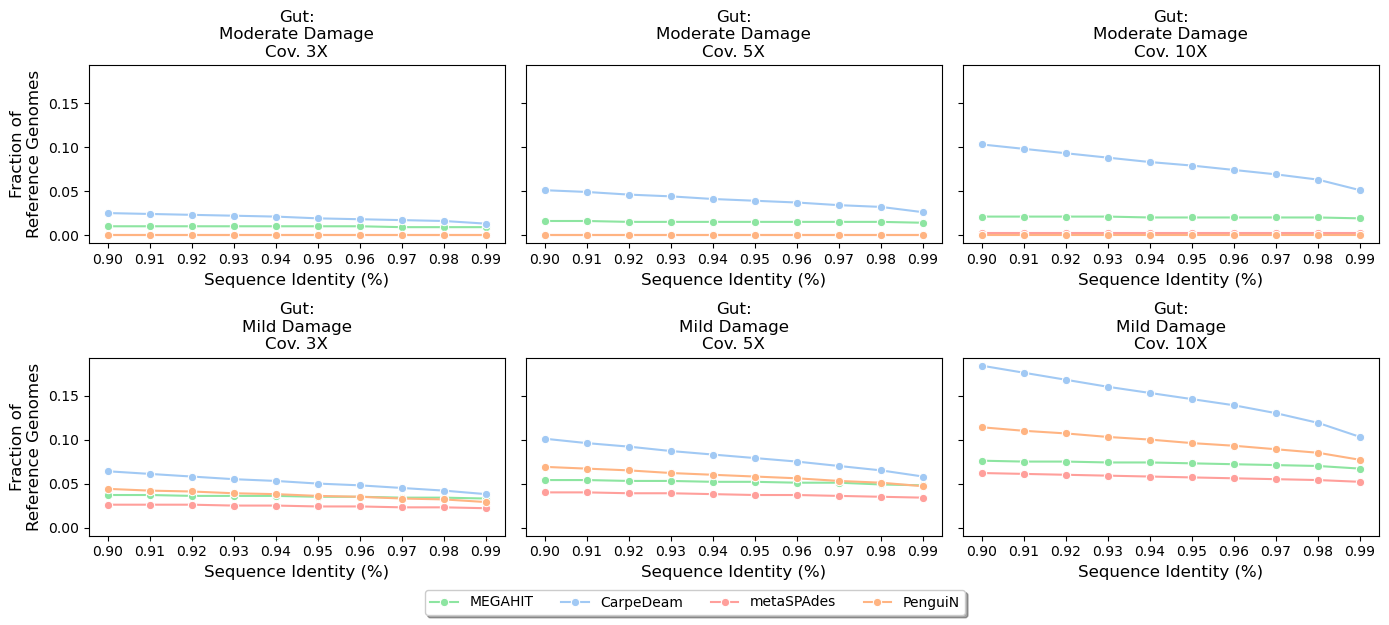

In [14]:
plot_data_fixed(dic_g, "gut")

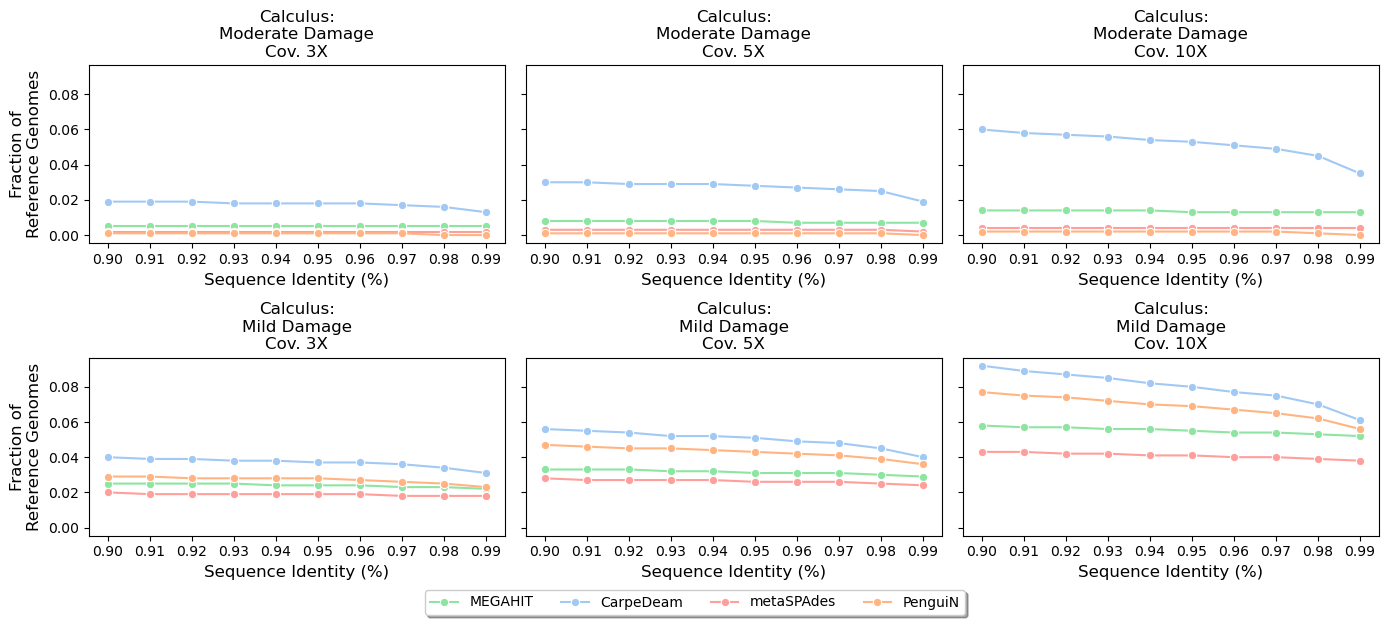

In [15]:
plot_data_fixed(dic_c, "calc")

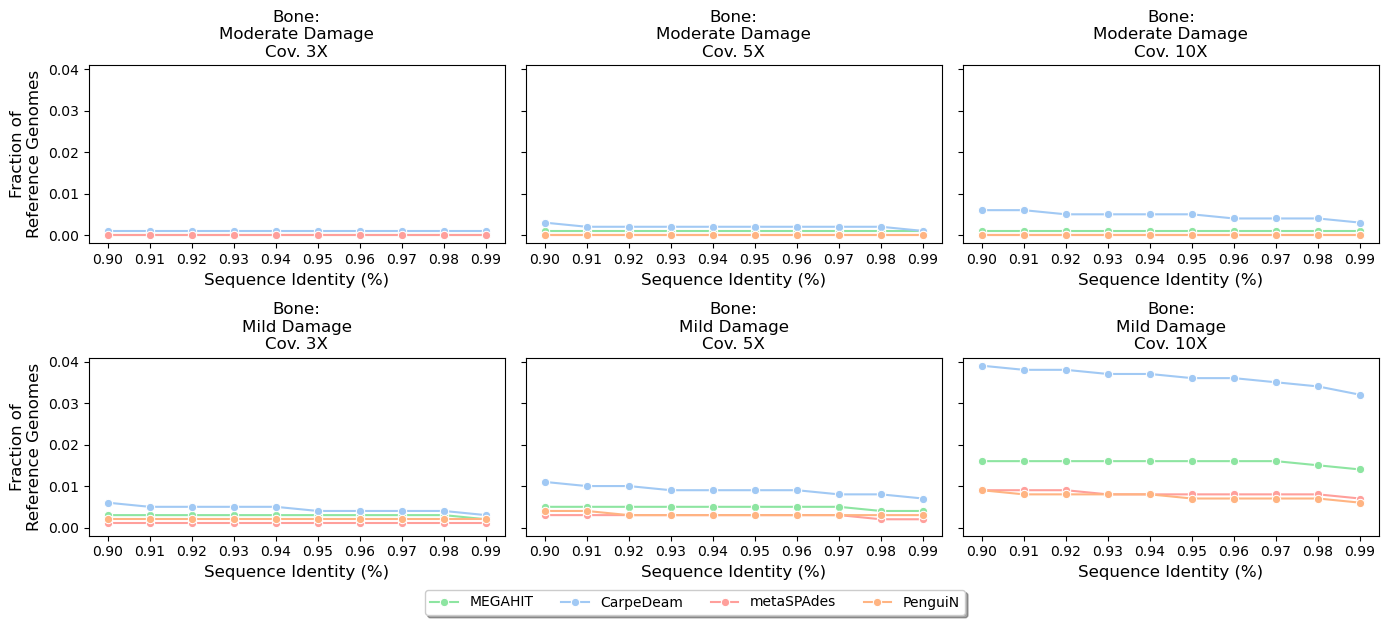

In [16]:
plot_data_fixed(dic_h, "horse")